In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys
from PIL import ImageDraw

# Description_Question-1

First we have to import an image and convert it into gray scale using open cv tools and display it.Part 1 is done.
Then to count pixels of each object in an image we have to iterate loop in all the pixels of an image ,and find the number of unique pixels other than 0 value(dark pixels) and place them in a dictionary along with their count in an image.Then using put text function write each object count on it place.Part two is done.
Te other way to get number of pixels of each object using open cv , first import the image ,convert in gray scale and then find its threshold where all the objects clearly be observed.then find number of contours and draw them,and at last find the area of each countours , which is the number of pixels of each object.Then find the midpoint of each contours and draw the area of contours at that place.Part 3 is done  


# Question1_Part 1

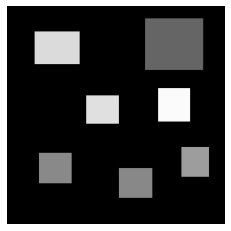

In [2]:
path = "img.jpg"
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.show()

# Question1_part2

In [3]:
'''
iterate a loop in image to see the row vice  unique pixel values of different items ,
to determine the sequence of objects means ,for example object having pixels value 90 come first if we search in row wise.
find each  pixel value and its count.Creates the dictioanry,  for example in this case  pixel value of 0 comes 71622 times
'''
a = np.array(img)
unique, counts = np.unique(a, return_counts=True)
z=dict(zip(unique, counts))
print((z))

{0: 71622, 1: 590, 2: 107, 3: 48, 4: 32, 5: 11, 6: 3, 7: 2, 8: 2, 83: 1, 85: 1, 87: 1, 88: 5, 89: 5, 90: 76, 91: 5368, 92: 209, 93: 3, 94: 8, 95: 2, 96: 1, 118: 1, 119: 1, 120: 2, 121: 45, 122: 1813, 123: 1899, 124: 10, 125: 3, 126: 2, 136: 1, 137: 1, 138: 3, 139: 8, 140: 9, 141: 1518, 142: 8, 143: 5, 144: 1, 145: 2, 146: 1, 147: 1, 192: 2, 193: 1, 194: 1, 195: 102, 196: 2619, 197: 60, 198: 9, 199: 6, 200: 4, 201: 1686, 202: 43, 203: 5, 204: 4, 205: 2, 207: 1, 221: 1, 222: 2, 223: 9, 224: 97, 225: 1891, 226: 11, 227: 10, 228: 2, 229: 1}


In [4]:
'''
find those pixel values those count are larger means the pixel of objects. and save there count in a list 
'''
color=[]
pixels=[]
for i,j in z.items():
    if j>1000 and i!=0:
        color.append(i)
        pixels.append(j)
print(color)
print(pixels)

[91, 122, 123, 141, 196, 201, 225]
[5368, 1813, 1899, 1518, 2619, 1686, 1891]


In [5]:
'''
arrange them in a sequence or
in a order in which  they appear in a image
'''
new_color=[91,196,225,201,141,123,121]
new_pixels=[5368,2619,1686,1891,1813,1899,1518]
org = [(200,50),(50,60),(110,150),(210,140),(45,230),(155,250),(240,220)]

In [6]:
'''
function to draw a text on the image
'''
def write_on_img(myImg,pxl,org,font,fontScale, color, thickness):
    myImg = cv2.putText(myImg,pxl,org, font,fontScale, color, thickness, cv2.LINE_AA)
    return myImg

In [7]:
'''
reading the image in gray scale and calling a function to write number of pixels on a particular object
'''
path = "img.jpg"
myImg = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
for i in range(7):
    myImg=write_on_img(myImg,str(new_pixels[i]),org[i],cv2.FONT_HERSHEY_SIMPLEX,0.5,(50,10,0),1)

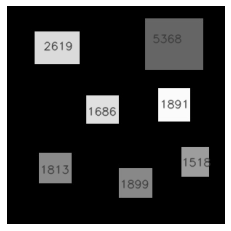

In [8]:
'''
display the final output image
'''
plt.imshow(myImg,cmap='gray')
plt.axis('off')
plt.show()

# Question_1_part3

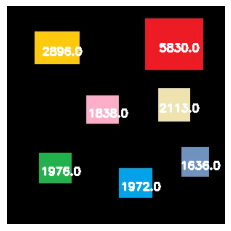

In [9]:
'''
reading the image and convert to gray scale, after than apply binary thresh hold to find only the shapes,
and fin the contours among each object in an image and
than find the area of each contour ,hence find the area or number of pixels in each object.

'''
image = cv2.imread("img.jpg")
# convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# create a binary thresholded image
_, binary = cv2.threshold(gray,20, 255, cv2.THRESH_BINARY_INV)
# find the contours from the thresholded image
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for c in range(len(contours)):
    ''' skip the first index as it holds the complete image and we need to find the size of objects only in an image'''
    if c==0:
        continue
    # compute the center of the contour
    M = cv2.moments((contours[c]))
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    cv2.putText(image, str(cv2.contourArea((contours[c]))), (cX - 20, cY + 10),
    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
# show the image
plt.imshow(image,cmap='gray')
plt.axis('off')
plt.show()

# Description-Question-2

In part 1 ,simply import the image and convert into gray scale using open cv and plot it using matplot.
In 2nd part ,we apply the binary threshold by setting value to 240 so that hand in an image can be easily seprate from the rest of the image background
In 3rd part, import the image in rgb and iterate loop over image ,as we know that it reads row by row every pixel value , so our target is to find the first distinct value of RGB ,which is the  first pixel value of large finger.Once we have find the target RGB value ,we have a function to get the x,y cordinates of that particular value and we simply thn draw a red circle using open cv function cv.circle,  on that place which is the tip of the finger.

# Question_2_part_1

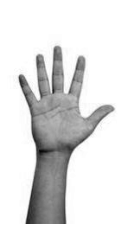

In [10]:
'''
reading the image in gray scale 
'''
path = "img2.jpg"
img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img2,cmap='gray')
plt.axis('off')
plt.show()

# Question_2_part_2

In [11]:
'''
Applying thresholding to an image to extract  ony hand
'''
threshold, img1 = cv2.threshold(img2, 240, 255, cv2.THRESH_BINARY_INV)

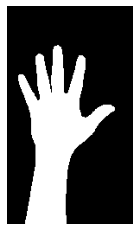

In [12]:
'''
Dislaying image after thresholding
'''
plt.imshow(img1,cmap='gray')
plt.axis('off')
plt.show()

# Question_2_part_3

In [13]:
path = "img2.jpg"
img = cv2.imread(path) 

In [14]:

'''
iterate loop in an image pixels np array to find the first distinct R,G,B value oter than 255 , means find R,g,B value of first pixel of hand color
as we have to find the largest image, so the beggining pixels of hand color defined largest finger because it reads row by row.
'''
def distinct_pxl():
    for i in img:
        for j in i:
            cnt=0
            for k in j:
                if k!=255:
                    cnt=cnt+1
                else:
                    cnt=0
            if cnt==3:
                return j


(252, 146, 3)


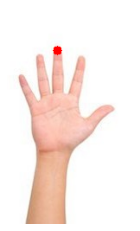

In [15]:
'''
calling distict_pxl function to get pixel x,y cordinate and place the red circle on this particular value
'''
np.set_printoptions(threshold=sys.maxsize)
path = "img2.jpg"
img = cv2.imread(path)  

lst=distinct_pxl()
red = lst[0]
green = lst[1]
blue = lst[2]

x,y,z = img.shape 

print(img.shape)

def looping(img):
    for i in range(x):  
        for j in range(y):  
            if img[i,j,0]==blue & img[i,j,1]==green & img[i,j,1]==red: 
    #             print("Found color at ",i,j)
                x_coord,y_coord = i,j

                center_coordinates = (y_coord-4,x_coord+15)    

                # Radius of circle
                radius = 5

                # Red color in BGR
                color = (0, 0, 255)

                # Line thickness of 2 px
                thickness = -1

                # Using cv2.circle() method
                # Draw a circle with blue line borders of thickness of 2 px
                img = cv2.circle(img, center_coordinates, radius, color, thickness)
                img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                
                return img
img=looping(img)
            
plt.imshow(img)
plt.axis('off')
plt.show() 

# Description_Question_3

First we are reading the image in gray scale and
calculating the value of scaling constant c and apply log tranformation using formula
s = c log(r + 1).
Here, s is the output intensity, r>=0 is the input intensity of the pixel,
and c is a scaling constant. c is given by 255/(log (1 + m)), where m is the maximum pixel value in the image.
and then take anti log using,formula
np.exp(image**1/c)-1
and then display both images to see the difference after taking log and anti log of an image
In log image ger more brighter as compare to original one,and similarly in case of antilog the image become more darker.

Then again we are reading image in gray scale and apply gamma transformation by seting different gamma values ina formula s=cr^γ
This symbol γ is called gamma,Variation in the value of γ varies the enhancement of the images.
and display al the images.
As can be observed from the outputs as well,
gamma>1 (indicated by the curve corresponding to ‘nth power’),
the intensity of pixels decreases i.e. the image becomes darker. On the other hand,
gamma<1 (indicated by the curve corresponding to 'nth root'),
the intensity increases i.e. the image becomes lighter.
too clearly observe the hanges we took 6 different gamma values and appy ina formula and show the results.

# Question_3

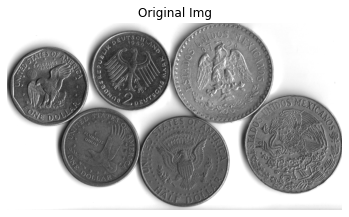

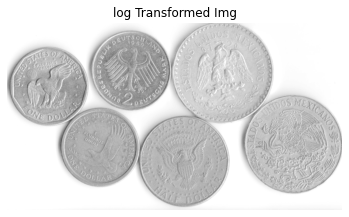

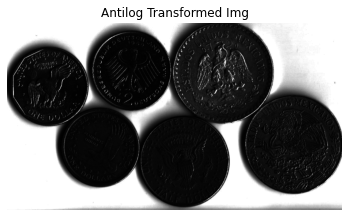

In [23]:
path = "Eagle_coins.jpg"
image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
# Apply log transformation method
c = 255 / np.log(1 + np.max(image))
log_image = c * (np.log(1.1+image ))

c = 255 / np.log(1 + np.max(image))
Anti_log_image = np.exp(image**1/c)-1

# Specify the data type so that
# float value will be converted to int
log_image = np.array(log_image, dtype = np.uint8)
Anti_log_image = np.array(Anti_log_image, dtype = np.uint8)
# Display all images
plt.title("Original Img")
plt.axis('off')
plt.imshow(image,cmap='gray')
plt.show()
plt.title("log Transformed Img")
plt.axis('off')
plt.imshow(log_image,cmap='gray')
plt.show()
plt.title("Antilog Transformed Img")
plt.axis('off')
plt.imshow(Anti_log_image,cmap='gray')
plt.show()

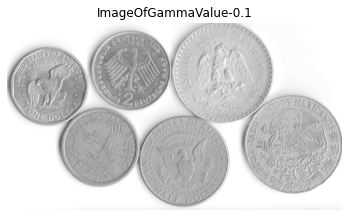

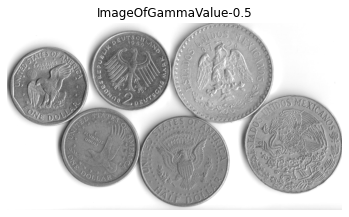

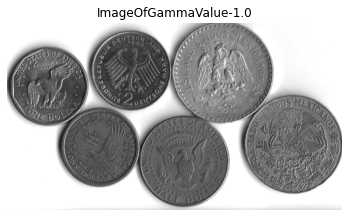

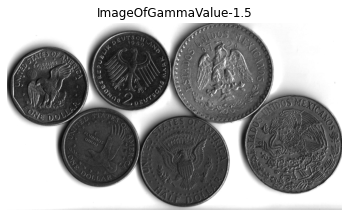

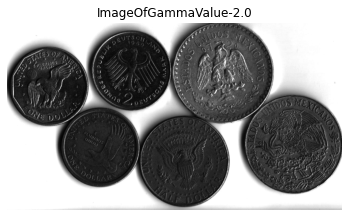

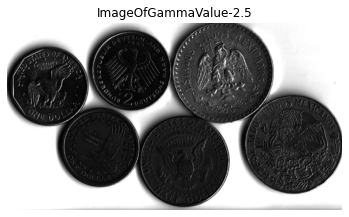

In [24]:
# Open the image.
path = "Eagle_coins.jpg"
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

# Trying 6 gamma values.
for gamma in [0.1, 0.5, 1.0,1.5, 2.0,2.5]:

# Apply pwer law transformation.
    gamma_corrected = np.array(255*(img / 255) ** gamma, dtype = 'uint8')
    plt.title("ImageOfGammaValue-"+str(gamma))
    plt.axis('off')
    plt.imshow(gamma_corrected,cmap='gray')
    plt.show()